In [1]:
!git clone https://github.com/YafetPontoh/capstone.git

fatal: destination path 'capstone' already exists and is not an empty directory.


In [2]:
%cd capstone

/content/capstone


In [3]:
!pip install nltk

In [19]:
import pandas as pd
import re
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt_tab')

# LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [5]:
data_path = '/content/capstone/dataset.csv'
data = pd.read_csv(data_path)
data.head()

,Sentence,Type
0,"Ali, who was two at the time, loved the story ...",Auditory
1,"Look at my dad, spiffed up in jodhpurs, ready ...",Auditory
2,Believe me it's far more difficult to know wha...,Auditory
3,"The Surrealists loved bad movies, seeing them ...",Auditory
4,"He idolised prize-fighters, regarded racketeer...",Auditory


## Assessing Data


In [6]:
class DataAssessing:
  def __init__(self, data):
    self.data = data

  def assessing_data(self):
    self.ismissing()
    self.isduplicate()
    self.info()
    self.describe()

  def ismissing(self):
    print('Jumlah missing value: ')
    print(self.data.isna().sum())
    self.pembatas()

  def info(self):
    print(self.data.info())
    self.pembatas()

  def describe(self):
    print(self.data.describe(include='all'))
    self.pembatas()

  def isduplicate(self):
    print('data duplikat: {}'.format(self.data.duplicated().sum()))
    self.pembatas()

  def pembatas(self):
    print('--------------------------')

assessing_data = DataAssessing(data)
assessing_data.assessing_data()

Jumlah missing value: 
Sentence    0
Type        0
dtype: int64
--------------------------
data duplikat: 758
--------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15450 entries, 0 to 15449
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sentence  15450 non-null  object
 1   Type      15450 non-null  object
dtypes: object(2)
memory usage: 241.5+ KB
None
--------------------------
                   Sentence    Type
count                 15450   15450
unique                14594       3
top     Show More Sentences  Visual
freq                    667    5827
--------------------------


## Cleaning Data

In [7]:
class DataCleaning:
  def __init__(self, data):
    self.data = data

  def cleaning (self, strategy):
    self.missing_value(strategy)
    self.duplicate_data()
    return self.data

  def missing_value(self, strategy):
    to_fill = ['ffill','bfill','mean','median','mode']
    if strategy in to_fill:
      self.data.fillna(method=strategy, inplace=True)
    elif strategy not in to_fill:
      if strategy == 'drop':
        self.data.dropna(inplace=True)
      else:
        raise ValueError(f"Valid options are: {', '.join(valid_strategies)}")
  def duplicate_data(self):
    self.data.drop_duplicates(inplace=True)

In [8]:
DataCleaning = DataCleaning(data)
data = DataCleaning.cleaning(strategy='drop')

In [9]:
DataAssessing(data).assessing_data()

Jumlah missing value: 
Sentence    0
Type        0
dtype: int64
--------------------------
data duplikat: 0
--------------------------
<class 'pandas.core.frame.DataFrame'>
Index: 14692 entries, 0 to 15449
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sentence  14692 non-null  object
 1   Type      14692 non-null  object
dtypes: object(2)
memory usage: 344.3+ KB
None
--------------------------
                                                 Sentence    Type
count                                               14692   14692
unique                                              14594       3
top     A sound film is a motion picture with synchron...  Visual
freq                                                    3    5548
--------------------------


## Data Preprocessing

In [10]:
def lower_clean(text):
  text = text.lower()
  text = re.sub(r'[^a-z ]','',text)
  tokens = word_tokenize(text)
  return ' '.join(tokens)

X = data['Sentence'].apply(lower_clean)
y = data['Type']

In [11]:
X

,Sentence
0,ali who was two at the time loved the story ab...
1,look at my dad spiffed up in jodhpurs ready to...
2,believe me its far more difficult to know what...
3,the surrealists loved bad movies seeing them a...
4,he idolised prizefighters regarded racketeers ...
...,...
15445,her appearance as the conwoman trying to fleec...
15446,however mostly in these classes i am trying to...
15447,no i can not lay down with a hanger hooked on ...
15448,in the meantime im trying to keep the organiza...


In [12]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
# Encoder
y = LabelEncoder().fit_transform(y)
y = to_categorical(y)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [33]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

def tokenize(X_train, X_test):
  # Tokenize
  tokenizer = Tokenizer()
  tokenizer.fit_on_texts(X_train)
  sequences = tokenizer.texts_to_sequences(X_train)
  sequences_test = tokenizer.texts_to_sequences(X_test)

  #Pad Sequences
  max_sequences = max(len(seq) for seq in sequences)
  sequences = pad_sequences(sequences, maxlen=max_sequences)
  sequences_test = pad_sequences(sequences_test, maxlen=max_sequences)
  return sequences, sequences_test, tokenizer, max_sequences


In [36]:
max_sequences

51

In [31]:
# LSTM Model
def create_lstm(vocab_size, max_len, output_dim):
  model = Sequential()
  model.add(Embedding(vocab_size, 200, input_length=max_len))
  model.add(LSTM(256, drop_out=0.2, recurrent_dropout=0.2, return_sequences=True))
  model.add(LSTM(128)),
  model.add(Dense(64, activation='relu'))
  model.add(Dense(3, activation='softmax'))

  model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

  return model

sequences, sequences_test, tokenizer, max_sequences = tokenize(X_train, X_test)
model = create_lstm(len(tokenizer.word_index) + 1, max_sequences, len(y[0]))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [30]:
print(f"Vocab size: {len(tokenizer.word_index) + 1}")
print(f"Max sequence length: {max_sequences}")
print(f"Output dimension: {len(y[0])}")

Vocab size: 26682
Max sequence length: 51
Output dimension: 3


In [32]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [27]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


history = model.fit(sequences, Y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2,
                    callbacks=[early_stopping])

Epoch 1/10
294/294 ━━━━━━━━━━━━━━━━━━━━ 26s 73ms/step - accuracy: 0.5543 - loss: 0.8511 - val_accuracy: 0.9583 - val_loss: 0.1500
Epoch 2/10
294/294 ━━━━━━━━━━━━━━━━━━━━ 41s 73ms/step - accuracy: 0.9804 - loss: 0.0719 - val_accuracy: 0.9685 - val_loss: 0.1209
Epoch 3/10
294/294 ━━━━━━━━━━━━━━━━━━━━ 42s 77ms/step - accuracy: 0.9919 - loss: 0.0330 - val_accuracy: 0.9660 - val_loss: 0.1298
Epoch 4/10
294/294 ━━━━━━━━━━━━━━━━━━━━ 41s 76ms/step - accuracy: 0.9934 - loss: 0.0243 - val_accuracy: 0.9596 - val_loss: 0.1422
Epoch 5/10
294/294 ━━━━━━━━━━━━━━━━━━━━ 19s 65ms/step - accuracy: 0.9932 - loss: 0.0235 - val_accuracy: 0.9643 - val_loss: 0.1422


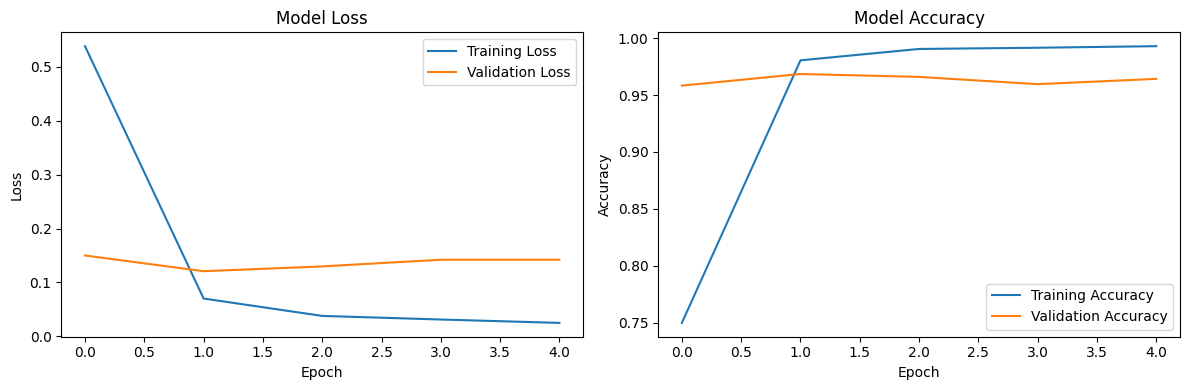

In [29]:


plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()
